# Task 1: Filters Visualization
## 1.1 - Load VGG16
We are loading a (pretrained) VGG16 via torchvision

In [1]:
import os
import random
import matplotlib.pyplot as plt

from PIL import Image

import torch
from torch.optim import Adam
from torchvision import models

from filters_visualization import visualise_layer_filter
from aux_ops import preprocess_image, recreate_image

RESULTS_DIR = 'results'

In [2]:
# Initialize GPU if available
use_gpu = False
if torch.cuda.is_available():
    use_gpu = True
# Select device to work on.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 1.1 load the pretrained VGG16 network
model = models.vgg16(pretrained=True)

/Users/janinaalicamattes/miniforge3/envs/pytorch-py11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/janinaalicamattes/miniforge3/envs/pytorch-py11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## 1.2 - Optimize input image


In [3]:
# Change the input image values in order to maximize output activation
# Print the shape, mean, minimum and maximum of the intermediate network-activations

layer_nmbr = 28
filter_nmbr = 228

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

# Fix model weights
for param in model.parameters():
    param.requires_grad = False
# Enable GPU
if use_gpu:
    model.cuda()

# use this output in some way
optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr)


/Volumes/Work Disk Janina Mattes/DEV/University/GAI/GAI-Visual-Synthesis/05_exercise/filters_visualization.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processed_image = torch.tensor(processed_image, device=device).float()


Step 00020. Loss:-77.63


## Task 1.3 - Visualize a random filter.

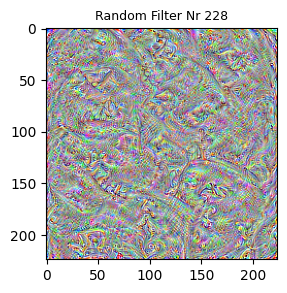

In [4]:
# Visualize a random filter.
# plot filter
plt.figure(figsize=(3,3))
plt.imshow(optimized_img)
plt.title('Random Filter Nr {}'.format(filter_nmbr), fontsize=9)
plt.savefig(os.path.join(RESULTS_DIR, 'filter_{}_{}.png'.format(layer_nmbr, filter_nmbr)))
plt.show()

## Task 1.4 - Visualize filters at different layers.

In [32]:
# Visualize filters at different layers.
selected_layer_numbers = [2, 4, 8, 16, 35, 122, 348, 420, 499]
selected_filter_numbers = [2, 4, 8, 16, 35, 122, 348, 420, 499]
collect_filters = []

for layer_nmbr, filter_nmbr in zip(selected_layer_numbers, selected_filter_numbers):
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr)
    collect_filters.append(optimized_img)

Step 00020. Loss:-1.75
Step 00020. Loss:-31.57
Step 00020. Loss:-41.56
Step 00020. Loss:-67.75
Step 00020. Loss:-95.39
Step 00020. Loss:-125.18
Step 00020. Loss:-90.78
Step 00020. Loss:-108.38
Step 00020. Loss:-181.34


In [33]:
# Calculate the number of rows needed for the grid

def plot_filters(collect_filters, selected_layer_numbers, selected_filter_numbers, plt_name='filter_grid.png'):
    # Set the number of columns and rows
    n_cols = 3
    n = len(collect_filters)
    n_rows = (n - 1) // n_cols + 1

    # Plot filters in a grid
    plt.figure(figsize=(7, 7))
    for i, img in enumerate(collect_filters):
        # Adjust the subplot parameters to plot three images in one row
        plt.subplot(n_rows, n_cols, i + 1)
        plt.title('Filter of Layer {}, Filter No'.format(selected_layer_numbers[i], selected_filter_numbers[i]), fontsize=6)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, plt_name))
    plt.show()

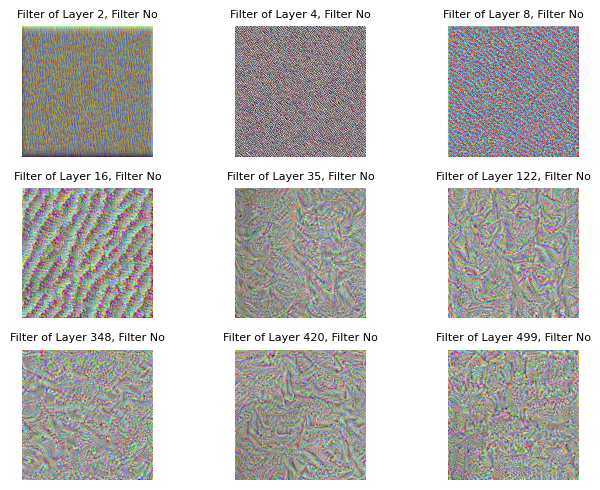

In [7]:
plot_filters(collect_filters, selected_layer_numbers, selected_filter_numbers)

**What do you observe going from earlier layers to later layers?**

* In the earlier layers of the pre-trained network, filters were learned that mainly represent local, simple and common visual elements such as edges, corners, and textures.  These elements are often low-level and specific to the input images.

* In later layers filters were learned that represent more complex and abstract visual concepts such as shapes, objects, and their spatial relationships. Such concepts are often high-level and can be comprised to global features of the input images.

* The receptive field of the filters, which is the region of the input image that affects the output of the filter, increases seemingly with later layers. This allows the later filters to capture more contextual information and long-range dependencies in the input images.

* Thereby, the hierarchical nature of the convolutional neural network enables the network to learn a rich and diverse set of features at different levels of abstraction.

## Task 1.5 - Hyperparameter tuning.


**1.5.1 Train with differing number of optimization steps**


In [8]:
layer_nmbr = 28
filter_nmbr = 228

num_optim_steps = [8, 16, 32, 64, 75, 128]
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for steps in num_optim_steps:
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, num_optim_steps=steps)
    collect_filters.append(optimized_img)


Step 00020. Loss:-81.21
Step 00020. Loss:-74.75
Step 00040. Loss:-181.61
Step 00060. Loss:-308.65
Step 00020. Loss:-79.94
Step 00040. Loss:-198.36
Step 00060. Loss:-339.77
Step 00020. Loss:-78.76
Step 00040. Loss:-190.68
Step 00060. Loss:-319.85
Step 00080. Loss:-462.23
Step 00100. Loss:-615.20
Step 00120. Loss:-776.65


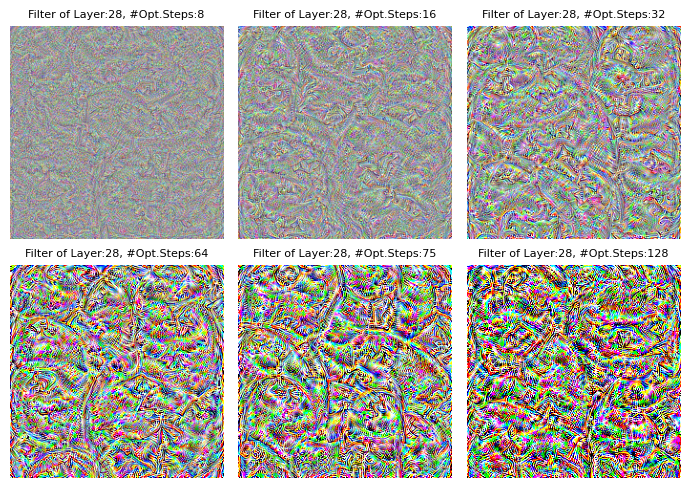

In [9]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_steps.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, #Opt.Steps:{}'.format(num_optim_steps[i]), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

**1.5.2 Train with differing number of learning rate**

In [10]:
learning_rates = [0.4, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for lr in learning_rates:
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, lr=lr)
    collect_filters.append(optimized_img)

Step 00020. Loss:-255.72
Step 00020. Loss:-204.45
Step 00020. Loss:-131.92
Step 00020. Loss:-81.73
Step 00020. Loss:-13.56
Step 00020. Loss:-0.59
Step 00020. Loss:1.46
Step 00020. Loss:1.73
Step 00020. Loss:1.68


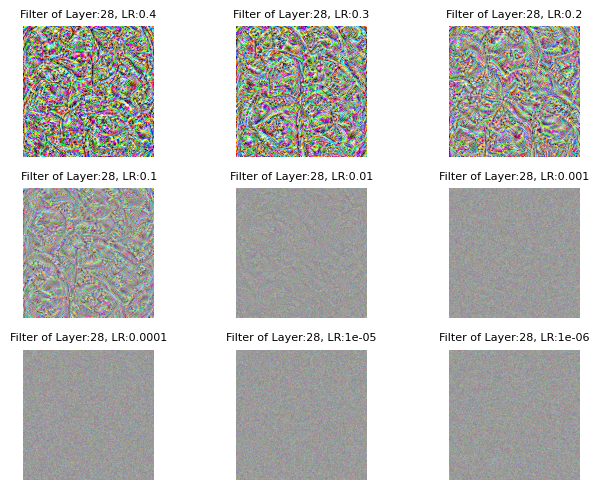

In [11]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_lr.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, LR:{}'.format(learning_rates[i]), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

**1.5.3 Train with differing type of optimizer**

In [12]:
optimizer_types = ['rmsprop','adam', 'adamax', 'sgd', 'asgd', 'adagrad',]
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for optim in optimizer_types:
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, optimizer_type=optim)
    collect_filters.append(optimized_img)

Step 00020. Loss:-294.44
Step 00020. Loss:-81.26
Step 00020. Loss:-54.77
Step 00020. Loss:0.97
Step 00020. Loss:1.12
Step 00020. Loss:-58.88


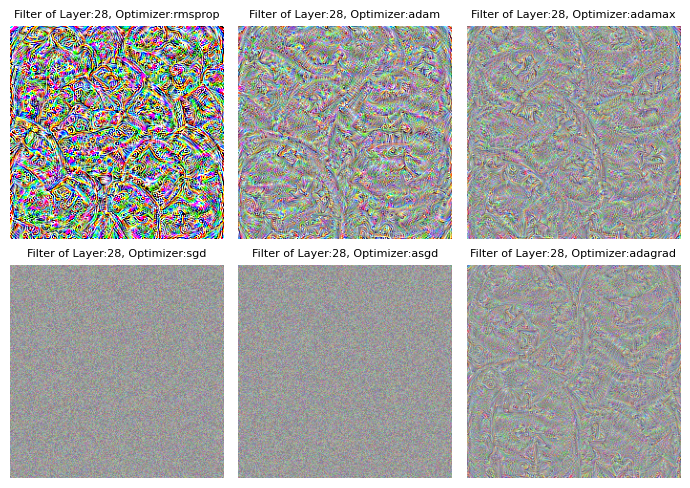

In [13]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_optim.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Optimizer:{}'.format(optimizer_types[i]), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

**What do you observe?**


In this experiment, a random distribution of pixels is generated and a pre-trained convolutional neural network (VGG16) is used to synthesize visual textures that maximize the activation of a selected filter. This is achieved by computing the mean activation of the filter and the gradient of the image with respect to the mean activation, and then updating the image using an optimizer to minimize the distance between them.

During the experiment, hyperparameter tuning was performed by increasing the number of optimization steps, using varying learning rates, and training with different optimizers.

* It was observed that the more optimization steps performed, the more the learned patterns of the selected filters influenced the output patterns on the previously randomly generated image. This is likely due to the more frequently repeated gradient step during backpropagation, which updates the filter weights to better match the desired pattern.
* Additionally, larger learning rates result in more clearly enhanced patterns on the random input image. This is because a larger learning rate allows the filter weights to be updated more aggressively, leading to a faster and more pronounced convergence to the desired pattern.
* It was also observed that optimizers such as RMSprop and those in the Adam family resulted in more visible patterns, while optimizers in the SGD family had a lesser visible effect. This may be due to the fact that RMSprop and Adam have adaptive learning rates, which can help to better optimize the network for the specific task of pattern enhancement. The adaptive learning rates allow for more fine-grained updates to the filter weights, leading to a more detailed and accurate convergence to output the desired pattern based on a selected filter.

## Task 1.6 - Pretrained weights.


/Users/janinaalicamattes/miniforge3/envs/pytorch-py11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Step 00020. Loss:-0.36


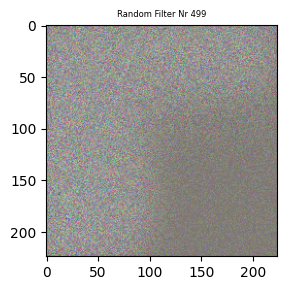

In [34]:
# Fully connected layer is not needed
model = models.vgg16(pretrained=False).features
model.eval()

# Visualize a random filter.
optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, optimizer_type=optim)
# plot filter
plt.figure(figsize=(3,3))
plt.title('Random Filter Nr {}'.format(filter_nmbr), fontsize=6)
plt.imshow(optimized_img)

**What do you observe?**

Without pretraining, the output image is noisy. This is because the weights or filters of the model are initialized with a random distribution and have not yet learned to extract meaningful features from the input. As a result, since we try to find an image that has a distribution close to the distribution of a selected random filter, the output image generated from the initial random noise will remain in its initial state, representing a noisy distribution.

# Task 2: Deep Dream

## Task 1.1 Most activated filters for every image

In [84]:
# Crop size
crop_size = (224, 224)

# Load images from the data folder
images = []
for file in os.listdir('data'):
    if file.endswith('.jpeg'):
        img_path = os.path.join('data', file)
        pil_img = Image.open(img_path).convert('RGB')
        
        # crop the image randomly
        width, height = pil_img.size
        left = random.randint(0, width - crop_size[0])
        top = random.randint(0, height - crop_size[1])
        right = left + crop_size[0]
        bottom = top + crop_size[1]
        pil_img = pil_img.crop((left, top, right, bottom))
        
        images.append(pil_img)

print(f"Found {len(images)} images in the data folder.")

Found 6 images in the data folder.


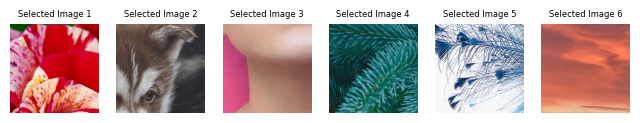

In [102]:
# plot the images
plt.figure(figsize=(8, 6))
for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Selected Image {i + 1}', fontsize=6)
plt.show()

In [87]:
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for img in images:
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, rand_img=img)
    collect_filters.append(optimized_img)


Step 00020. Loss:-265.91
Step 00020. Loss:-167.24
Step 00020. Loss:-196.29
Step 00020. Loss:-262.26
Step 00020. Loss:-126.74
Step 00020. Loss:-85.96


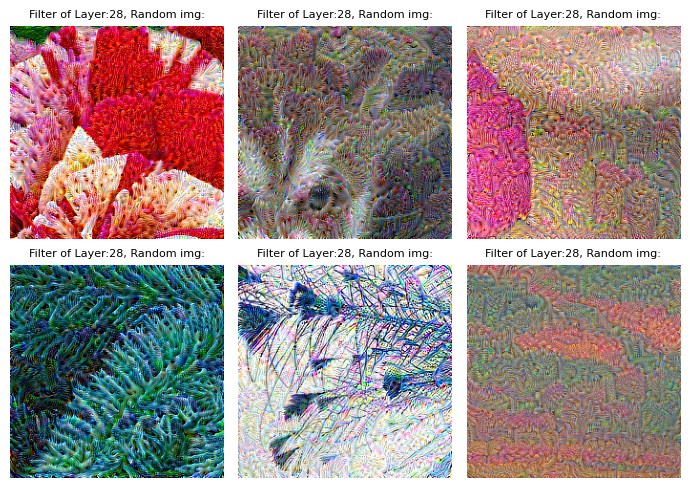

In [88]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_randImg.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Random img:'.format(i), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

In [89]:
# task 2.1: analyze the conv_output tensor without indexing the filter with filter_nmbr
# select the 10 most activated filters for each content image to analyse what the network sees

def visualise_10_most_activated_filters(model, layer_nmbr, rand_img, num_optim_steps=26, lr=0.1, weight_decay=1e-6):
    # Process image and return variable
    processed_image = preprocess_image(rand_img, False)
    processed_image = torch.tensor(processed_image, device=device).float()
    processed_image.requires_grad = True
    # Define optimizer for the image
    optimizer = Adam([processed_image], lr=lr, weight_decay=weight_decay)
    for i in range(1, num_optim_steps):
        optimizer.zero_grad()
        # Assign create image to a variable to move forward in the model
        x = processed_image
        for index, layer in enumerate(model):
            # Forward pass layer by layer
            x = layer(x)
            if index == layer_nmbr:
                # Only need to forward until the selected layer is reached
                # Now, x is the output of the selected layer
                break
        
        ######################################
        #### Loss based on Top 10 Filters ####
        ######################################

        # Compute the mean activation of each filter in the selected layer
        conv_output = x[0]
        mean_activation = torch.mean(conv_output, dim=(1, 2))

        # Select the 10 filters with the highest mean activation
        top_10_filters = torch.topk(mean_activation, 10)[0]
        
        # Loss function is the mean of the output of the selected filters
        loss = -torch.mean(top_10_filters)

        if i % 20 == 0:
            print(f'Step {i:05d}. Loss:{loss.data.cpu().numpy():0.2f}')

        # Compute gradients
        loss.backward()
        # Apply gradients
        optimizer.step()
        
        # Recreate image
        optimized_image = recreate_image(processed_image.cpu())

    return optimized_image


In [90]:
layer_nmbr = 28
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for img in images:
    optimized_img = visualise_10_most_activated_filters(model, layer_nmbr=layer_nmbr, rand_img=img)
    collect_filters.append(optimized_img)


/var/folders/4h/v0fwv1zs4596mmdvwj516k840000gn/T/ipykernel_28888/1426540431.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processed_image = torch.tensor(processed_image, device=device).float()


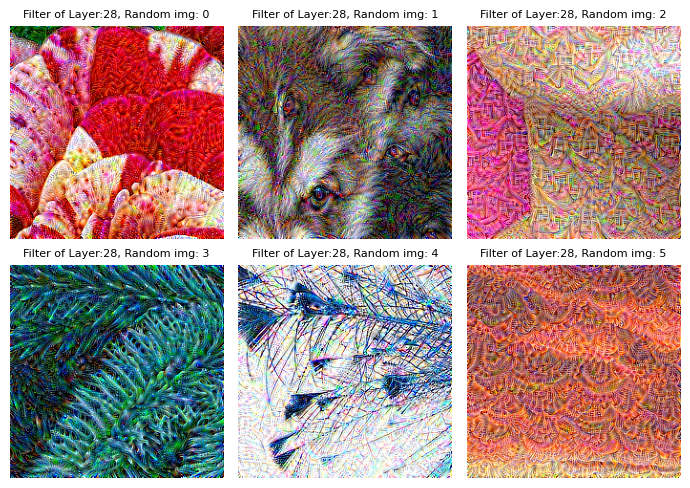

In [91]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_10act_randImg.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Random img: {}'.format(i), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

**What do you observe?**

In this exercise, the most activated filters for each content image are analysed to gain insight into what content, textures, elements etc. the neural network itself actually "sees" in those images. To do this, we run the pre-trained network in reverse, adjusting the original image slightly to increase the activation of the top 10 filters. This process allows to visualize the patterns and structures that the network has learned during training to recognize in an image during inference time.

The reverse process used in this exercise is a one-to-many mapping, where each filter can be activated by multiple different patterns in the input image. By analyzing the top 10 most activated filters for each image, we can identify the patterns and structures that are most relevant for the network's classification decision.

Overall, this exercise provides a valuable tool for understanding the emergent structure of the neural network and the patterns it has learned to recognize in the input images.

## Task 1.2 Total variation loss.

**Task 2.1 Images recreated with total variational loss**

In [92]:
# Compare the neighbouring pixels via variational loss function
# Enhances additional image smoothness
layer_nmbr = 28
filter_nmbr = 228

collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for img in images:
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, rand_img=img, total_var_loss=True)
    collect_filters.append(optimized_img)

Step 00020. Loss:9569329.00
Step 00020. Loss:6497289.50
Step 00020. Loss:4143610.50
Step 00020. Loss:6919841.50
Step 00020. Loss:19560798.00
Step 00020. Loss:4279034.50


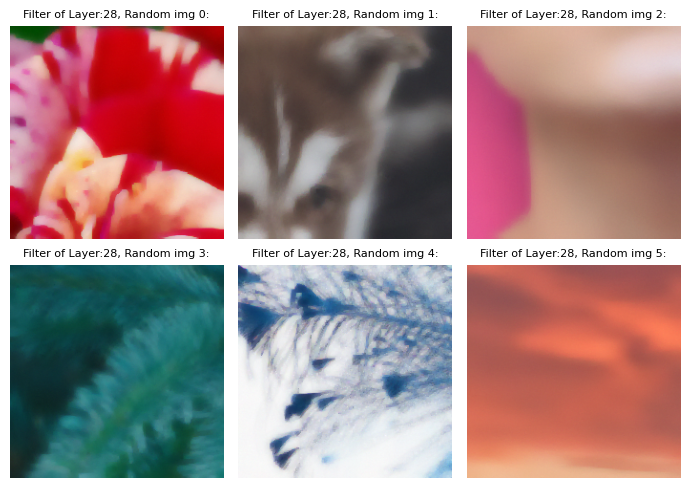

In [93]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_smooth_randImg.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Random img {}:'.format(i), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

In [94]:
# images without additional smoothness
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for img in images:
    optimized_img = visualise_layer_filter(model, layer_nmbr=layer_nmbr, filter_nmbr=filter_nmbr, rand_img=img, total_var_loss=False)
    collect_filters.append(optimized_img)

Step 00020. Loss:-120.99
Step 00020. Loss:-79.47
Step 00020. Loss:-84.79
Step 00020. Loss:-90.29
Step 00020. Loss:-80.42
Step 00020. Loss:-73.74


**Task 2.2 Images recreated without total variational loss**

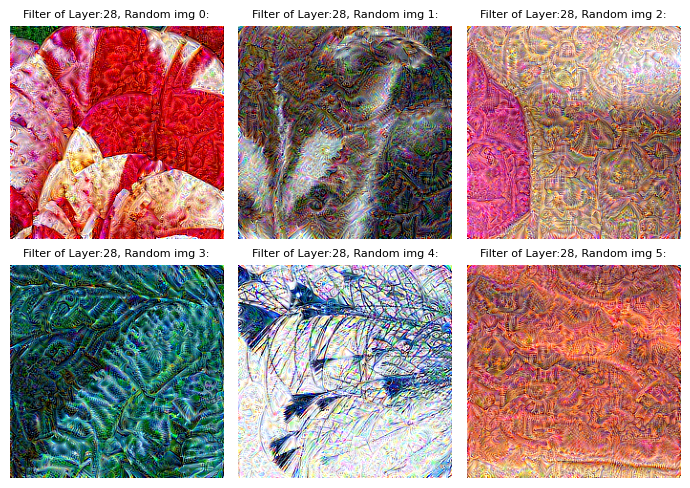

In [95]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_noSmooth_randImg.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Random img {}:'.format(i), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

## Task 1.3 Deep dream.

In [96]:
def total_variation_loss(img, weight):
    # Calculate total variation loss
    return weight * (torch.sum(torch.abs(img[:, :, :, :-1] - img[:, :, :, 1:])) + torch.sum(torch.abs(img[:, :, :-1, :] - img[:, :, 1:, :])))

In [97]:
def deep_dream(model, layer_nmbr, input_image, num_optim_steps=26, lr=0.1, weight_decay=1e-6, total_var_loss=True, total_variation_loss_weight=500., device='cpu'):
    # Process image and return variable
    processed_image = preprocess_image(input_image, False)
    processed_image = torch.tensor(processed_image, device=device).float()
    processed_image.requires_grad = True
    # Define optimizer for the image
    optimizer = Adam([processed_image], lr=lr, weight_decay=weight_decay)
    for i in range(1, num_optim_steps):
        optimizer.zero_grad()
        # Assign create image to a variable to move forward in the model
        x = processed_image
        for index, layer in enumerate(model):
            # Forward pass layer by layer
            x = layer(x)
            if index == layer_nmbr:
                # Only need to forward until the selected layer is reached
                # Now, x is the output of the selected layer
                break

        ######################################
        ####      Loss with L2 Norm       ####
        ######################################

        # Maximize the activations of all filters in the selected layer
        # Compute the L2 norm of the activations tensor
        activation_norm = torch.linalg.norm(x)
            
        # Loss function is the negative of the activation norm
        loss = -activation_norm
            
        if total_var_loss:
            # Add total variation loss later
            loss_tv = total_variation_loss(processed_image, total_variation_loss_weight)
            loss = loss + (loss_tv*1.)

        if i % 20 == 0:
            print(f'Step {i:05d}. Loss:{loss.data.cpu().numpy():0.2f}')
        
        # Compute gradients
        loss.backward()
        # Apply gradients
        optimizer.step()
        # Recreate image
        optimized_image = recreate_image(processed_image.cpu())

    return optimized_image


**Task 3.1 Experiment with small weight for TV loss**

In [98]:
# images without additional smoothness
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for img in images:
    optimized_img = deep_dream(model, layer_nmbr, img, num_optim_steps=32, lr=0.1, total_variation_loss_weight=0.5)
    collect_filters.append(optimized_img)

/var/folders/4h/v0fwv1zs4596mmdvwj516k840000gn/T/ipykernel_28888/3454436734.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processed_image = torch.tensor(processed_image, device=device).float()


Step 00020. Loss:-4781.27
Step 00020. Loss:-11218.69
Step 00020. Loss:-17181.64
Step 00020. Loss:-8275.25
Step 00020. Loss:11280.38
Step 00020. Loss:-18597.48


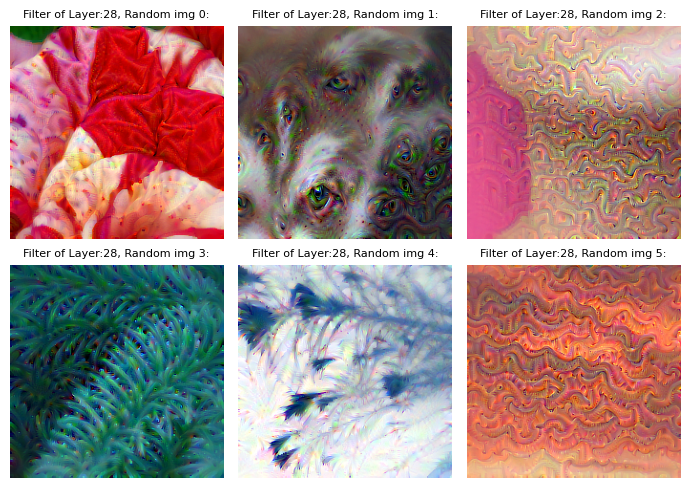

In [99]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_deepDream_randImg.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Random img {}:'.format(i), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

**Task 3.2 Experiment with largegr weight for TV loss**

In [100]:
# images without additional smoothness
collect_filters = []

# Fully connected layer is not needed
model = models.vgg16(pretrained=True).features
model.eval()

for img in images:
    optimized_img = deep_dream(model, layer_nmbr, img, num_optim_steps=32, lr=0.1, total_variation_loss_weight=10.)
    collect_filters.append(optimized_img)

/var/folders/4h/v0fwv1zs4596mmdvwj516k840000gn/T/ipykernel_28888/3454436734.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processed_image = torch.tensor(processed_image, device=device).float()


Step 00020. Loss:189286.44
Step 00020. Loss:127721.91
Step 00020. Loss:81970.71
Step 00020. Loss:136544.62
Step 00020. Loss:389433.66
Step 00020. Loss:84517.95


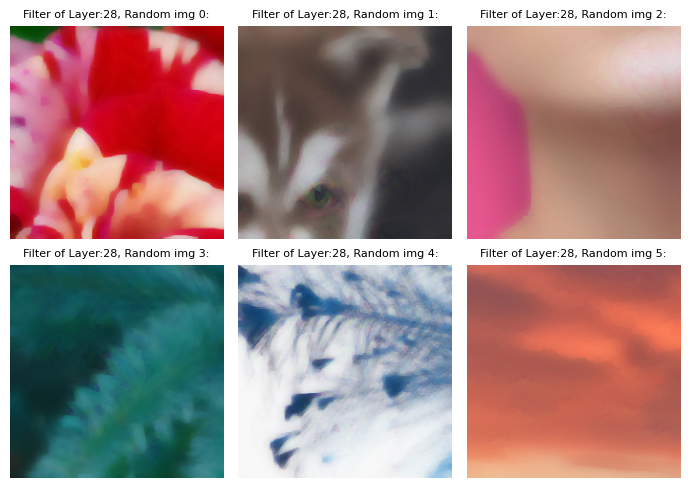

In [101]:
# Set the number of columns and rows
n_cols = 3
n = len(collect_filters)
n_rows = (n - 1) // n_cols + 1

plt_name = 'filter_grid_deepDream_randImg_smooth.png'

# Plot filters in a grid
plt.figure(figsize=(7, 5))
for i, img in enumerate(collect_filters):
    # Adjust the subplot parameters to plot three images in one row
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title('Filter of Layer:28, Random img {}:'.format(i), fontsize=8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, plt_name))
plt.show()

**What can you observe?**

* When using lower weights for the smoothing factor of the total variation loss (TV), the impact is minimal because the TV loss is not heavily emphasized in the optimization process. The primary focus is on minimizing the difference between the predicted output and the true output, which means the model is more concerned with accurately activating neurons of all layers than with producing a smooth image. As a result, the output image highlights the elements of the activation map that have the most significant impact on neuron activation (e.g. Huskey eye, or parts of the woman's auricle, cloud formation etc.).
* When using higher weights for the smoothing factor of the TV loss, the optimization process places more emphasis on producing a smooth image. The smoothing factor encourages neighboring pixels to have similar values, which can help to eliminate noise and reduce the appearance of artifacts in the image. However, this can also have the effect of blurring or distorting the image, particularly in areas where there are sharp changes in pixel values. In this case, the output image may be more cohesive and visually appealing, but it may also be less faithful to the original activation map.